# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Denise Kyla B. Castro\
_Student No._: 2022-10832\
_Section_: THV-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: November 30, 2024 and 11:01 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Denise Kyla B. Castro** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

In determining the total energy of the system, we make use of the formula given above:

$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$

where J is the positive interaction constant (ensures ferromagnetic coupling), and $s_{ij} = \pm1$ represent the spin states at neighboring sites. The interaction energy between two spins $E_{ij}$ depends on their alignment:

$$ E_{ij} = s_i s_j = \begin{cases} 1 & \text{for aligned spins} \\ -1 & \text{for unaligned spins} \end{cases}$$

In the code, we consider a 20 x 20 square lattice with a random assignment of spin states where each spin has a
50% probability of being $+1$ or $-1$. This ensures that there is an approximately equal distribution of spin up and spin down states throughout the lattice.

Given that the magnetization is the sum of the spin states described as:
$$M = \sum_i s_i,$$

we expect that the initial magnetization is close to zero due to the approximately balanced distribution of spin states.


The total energy of the system is -2 and its magnetization is -2.


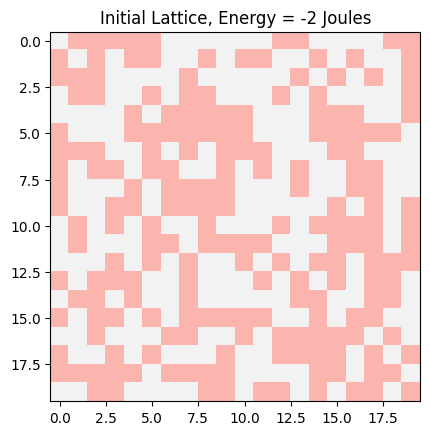

In [33]:
#1. Calculate the total energy of the system.

import numpy as np                                                                                  # library for arrays
import matplotlib.pyplot as plt                                                                     # library for plotting

N = 20                                                                                              # size of the lattice --> to create an N x N grid
p = 0.5                                                                                             # probability 

# function that generates a lattice of spins (sites can either be 1 or -1)
def gen_lattice(dimension, init):      
    return np.random.choice([1,-1], size=(dimension, dimension), p=[init, 1-init])                  # randomly assigns 1 or -1 to the lattic based on their probability p

initial_lattice = gen_lattice(N,p)                                                                  # creates a 20 x 20 array 

# function that computes the total energy
def get_energy(lattice):
    energy = -np.sum(lattice[:-1, :] * lattice[1:, :]) - np.sum(lattice[:, :-1] * lattice[:, 1:])   # lattice[:-1, :] * lattice[1:, :] - multiplies vertically adjacent spins; lattice[:, :-1] * lattice[:, 1:] - multiplies horizontally adjacent spins
    return energy

# function that computes the total magnetization
def get_magnetization(lattice):
    return lattice.sum()                                                                            # sums all the spin values

energy = get_energy(initial_lattice)                                                                # stores the total energy
magnetization = get_magnetization(initial_lattice)                                                  # stores the total magnetization
print(f"The total energy of the system is {energy} and its magnetization is {magnetization}.")      # prints out the total energy and magnetization

plt.imshow(initial_lattice, cmap='Pastel1')                                                         # display initial lattice as 2D image
plt.title(f"Initial Lattice, Energy = {energy} Joules")                                             # title
plt.show()                                                                                          # shows plot

To implement the Markov Chain Monte Carlo (MCMC) simulation, we will make use of the metropolis acceptance formula, $P_a$, defined as:

$$P_a = \begin{cases} 1 &\text{if } E_j \leq E_i
\\ e^{-\beta (E_j - E_i)} &\text{if } E_j > E_i \end{cases} $$

Here, $E_j$ is the energy of the system after the spin flip,
$E_i$ is the energy before the spin flip, and $\beta = \frac{1}{k_b T}$ where $k_b$ is the Boltzmann constant and $T$ is the temperature of the system.

This acceptance probability determines how the Ising model evolves over time. In the code, a lattice site is randomly chosen, and a spin flip is proposed. If the resulting energy $E_j$ is less than or equal to the initial energy $E_i$, the spin flip is always accepted. Conversely, if $E_j$ is greater than $E_i$, the spin flip may still be accepted, but with a probability proportional to $e^{-\beta (E_j - E_i)}$. If the spin flip is rejected, the system retains it current state.


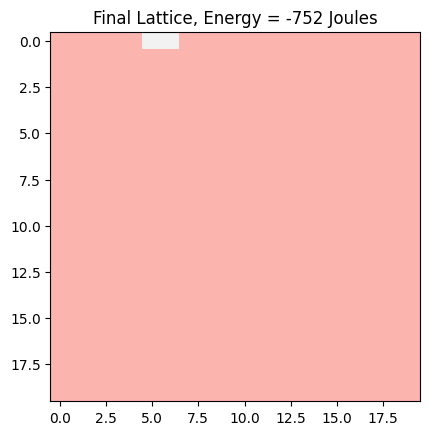

In [34]:
J = 1                                                                       # positive interaction constant
T = 1                                                                       # temperature of system
k_b = 1                                                                     # boltzmann constant
beta = 1/k_b*T                                                              # reciprocal of thermodynamic temperature of a system
steps = 1000000                                                             # number of monte carlo steps

energy_array = np.zeros(steps)                                              # store system's energy
magnetization_array = np.zeros(steps)                                       # store system's magnetization

for i in range(steps):                                                      # loop that iterates the monte carlo step
    energy_array[i] = energy                                                # stores current energy at step i
    magnetization_array[i] = magnetization                                  # stores current magnetization at step i

    x, y = np.random.randint(0, N), np.random.randint(0, N)                 # randomly select a lattice site by choosing x and y coordinates
    initial_lattice[x, y] *= -1                                             # flip spin at selected site by multiplying its value by -1

    new_energy = get_energy(initial_lattice)                                # calculate total energy of lattice after spin flip
    delta_E = new_energy - energy                                           # compute energy change after spin flip

    # Metropolis acceptance criterion
    if delta_E > 0 and np.random.random() >= np.exp(-beta * delta_E):       # if spin flip increases energy accept probability                         
        initial_lattice[x, y] *= -1                                         # reject flip
    else:
        energy = new_energy                                                 # update energy once spin flip is accepted
        magnetization = get_magnetization(initial_lattice)                  # if spin flip is accepted, recalculate magnetization
    
# Final lattice and plots
plt.imshow(initial_lattice, cmap='Pastel1')                                 # display final lattice as 2D image
plt.title(f"Final Lattice, Energy = {energy} Joules")                       # title
plt.show()                                                                  # shows plot

Comparing this with the initial lattice, we can see here that the final lattice is mostly made up of spin down states.

This is due to $\beta = 1$ which if we apply to metropolis acceptance formula we get

$$P_a = \begin{cases} 1 &\text{if } E_j \leq E_i
\\ e^{(E_i - E_j)} &\text{if } E_j > E_i \end{cases} $$

The energy of the lattice decreases as more and more spins become aligned.

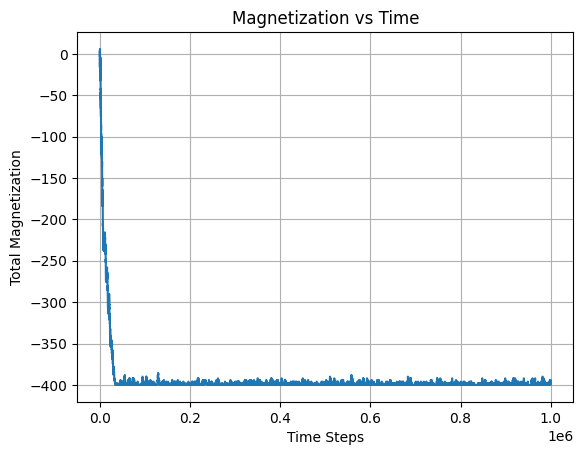

In [ ]:
# Plot magnetization over time  
plt.plot(magnetization_array)                                           # plot magnetization vs time
plt.title("Magnetization vs Time")                                      # title
plt.xlabel("Time Steps")                                                # x-label
plt.ylabel("Total Magnetization")                                       # y-label
plt.grid()                                                              # grid
plt.show()                                                              # shows plot

This plot shows the behavior of total magnetization over time. Initially, the magnetization starts near zero due to the even distribution of spin-up and spin-down states. Over time, it sharply decreases, indicating that the spins are aligning. Then, the plot reaches a steady state with fluctuations around -400. Despite these fluctuations, the system appears to have reached equilibrium. The negative value of the magnetization indicates that the dominant spin orientation is negative.